In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function,division
%matplotlib inline

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
from Pic.maxent_style import *

In [9]:
"""
=====
SMOTE
=====
An illustration of the SMOTE method and its variant.
"""

# Authors: Fernando Nogueira
#          Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import pandas as pd

from imblearn.over_sampling import SMOTE
from Pic.maxent_style import maxent_style,remove_palette
from sklearn.preprocessing import StandardScaler

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5,c="blue")
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5,c="red")
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])
    return c0, c1


=====
SMOTE
=====
An illustration of the SMOTE method and its variant.



In [5]:
# Generate the dataset
data = pd.read_csv("../Data/creditcard.csv")
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
X = data.ix[:, data.columns != 'Class']
y = data['Class']
print(X.head())
print(y.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10     ...           V20       V21       V22  \
0  0.098698  0.363787  0.090794     ...      0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974     ...     -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643     ...      0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952     ...     -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074     ...      0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  normAmount  
0 -0.11047

In [6]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

In [7]:
@maxent_style
@remove_palette
def picSMOTE():
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
    # Remove axis for second plot
    ax2.axis('off')
    ax_res = [ax3, ax4, ax5, ax6]
    c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
    for i in range(len(kind)):
        plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

    ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
    plt.tight_layout()
    plt.show()

remove_palette_inner
picSMOTE


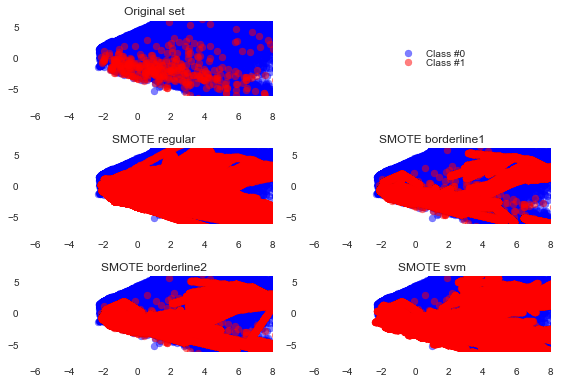

In [10]:
picSMOTE()